## 전자 제품 회사의 이커머스 이벤트 히스토리 (캐글)

- 2019년 10월부터 2020년 2월까지 5월까지의 큰 전자제품 온라인 상점의 5달 동안의 유저 행동 데이터를 포함
- 각 데이터의 행은 이벤트를 나타내며, 이벤트는 상품과 유저와 관련있음
- 각 이벤트는 상품과 유저의 many-to-many relation
- 하나의 세션에는 여러개의 구매 기록이 남을 수 있지만, 1개의 주문으로 봄

### 데이터 명세

- event_time: 이벤트가 일어난 시간 (UTC: 국제 표준시)
- event_type: view(상품 보기), cart(장바구니 담기), remove_from_cart(장바구니에서 제거하기), purchase (구매하기)
- product_id: 상품 ID
- category_id: 카테고리 ID
- category_code: 카테고리 코드 이름
- brand: 브랜드 이름
- price: 상품의 가격
- user_id: 유저 아이디
- user_session: 유저 세션 아이디 

In [1]:
# 라이브러리 불러오기
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

In [3]:
# 데이터 불러오기
df = pd.read_csv("C:/Users/none/Downloads/event_log.csv", encoding="utf-8")
df

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2020-09-24 11:57:06 UTC,view,1996170,2144415922528452715,electronics.telephone,NaN,31.90,1515915625519388267,LJuJVLEjPT
1,2020-09-24 11:57:26 UTC,view,139905,2144415926932472027,computers.components.cooler,zalman,17.16,1515915625519380411,tdicluNnRY
2,2020-09-24 11:57:27 UTC,view,215454,2144415927158964449,NaN,NaN,9.81,1515915625513238515,4TMArHtXQy
3,2020-09-24 11:57:33 UTC,view,635807,2144415923107266682,computers.peripherals.printer,pantum,113.81,1515915625519014356,aGFYrNgC08
4,2020-09-24 11:57:36 UTC,view,3658723,2144415921169498184,NaN,cameronsino,15.87,1515915625510743344,aa4mmk0kwQ
...,...,...,...,...,...,...,...,...,...
885124,2021-02-28 23:55:01 UTC,view,953226,2144415927553229037,NaN,NaN,219.94,1515915625611023730,FRLqIttxKU
885125,2021-02-28 23:58:05 UTC,view,1715907,2144415927049912542,electronics.video.tv,starwind,80.03,1515915625611024014,g6WqPf50Ma
885126,2021-02-28 23:58:09 UTC,view,4170534,2144415939364389423,electronics.clocks,amazfit,64.92,1515915625611024020,xNIJBqZdkd
885127,2021-02-28 23:58:14 UTC,view,888273,2144415921932861531,electronics.telephone,NaN,10.16,1515915625611024030,9pCbKMIcSx


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 885129 entries, 0 to 885128
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   event_time     885129 non-null  object 
 1   event_type     885129 non-null  object 
 2   product_id     885129 non-null  int64  
 3   category_id    885129 non-null  int64  
 4   category_code  648910 non-null  object 
 5   brand          672765 non-null  object 
 6   price          885129 non-null  float64
 7   user_id        885129 non-null  int64  
 8   user_session   884964 non-null  object 
dtypes: float64(1), int64(3), object(5)
memory usage: 60.8+ MB


In [5]:
df[["price"]].describe()

,price
count,885129.000000
mean,146.328713
std,296.807683
min,0.220000
25%,26.460000
50%,65.710000
75%,190.490000
max,64771.060000


In [6]:
df.min()

event_time     2020-09-24 11:57:06 UTC
event_type                        cart
product_id                         102
category_id        2144415921001726020
price                             0.22
user_id            1515915625353226922
dtype: object

In [7]:
df.max()

event_time     2021-02-28 23:59:09 UTC
event_type                        view
product_id                     4183880
category_id        2227847332769039290
price                          64771.1
user_id            1515915625611024030
dtype: object

### Active Users
- 특정 기간 안에 어플리케이션이나 웹사이트에 방문하는 unique 유저수를 의미
- 장점 : 거의 모든 서비스에서 쉽게 구할 수 있어서 자주 쓰이는 지표
- 단점 : 유저의 방문만 보기 때문에 서비스 내 활동성이 있는 유저 또는 전환한 유저가 얼마나 되는지 측정할 수 없음

### Daily Active User(DAU)

In [12]:
# 날짜 전처리하기
df["event_date"] = df["event_time"].str[0:10]
df["event_date_format"] = pd.to_datetime(df["event_date"], format="%Y-%m-%d")

# 날짜가 2020-09-24일부터 있기 때문에 10월 1일부터 2월 28일간 데이터로 바꿈
df = df.loc[(df["event_date"] > "2020-09-30")]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 885129 entries, 0 to 885128
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   event_time         885129 non-null  object        
 1   event_type         885129 non-null  object        
 2   product_id         885129 non-null  int64         
 3   category_id        885129 non-null  int64         
 4   category_code      648910 non-null  object        
 5   brand              672765 non-null  object        
 6   price              885129 non-null  float64       
 7   user_id            885129 non-null  int64         
 8   user_session       884964 non-null  object        
 9   event_date         885129 non-null  object        
 10  event_date_format  885129 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(3), object(6)
memory usage: 74.3+ MB


In [16]:
# 일별 unique user 수
df2 = df.groupby("event_date")[["user_id"]].nunique()
df2

,user_id
event_date,
2020-10-01,2699
2020-10-02,2559
2020-10-03,2162
2020-10-04,2398
2020-10-05,2832
...,...
2021-02-24,2904
2021-02-25,2784
2021-02-26,2960


In [17]:
df2.describe()

,user_id
count,151.000000
mean,2984.854305
std,472.763921
min,1370.000000
25%,2683.500000
50%,2943.000000
75%,3308.500000
max,4287.000000


### 일별 유저수 변화 그래프로 그려보기

Text(0, 0.5, '유저수')

findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.
C:\Users\none\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 51068 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\none\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 48324 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\none\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 50976 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\none\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 51200 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\none\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 49688 missing from current font.
 

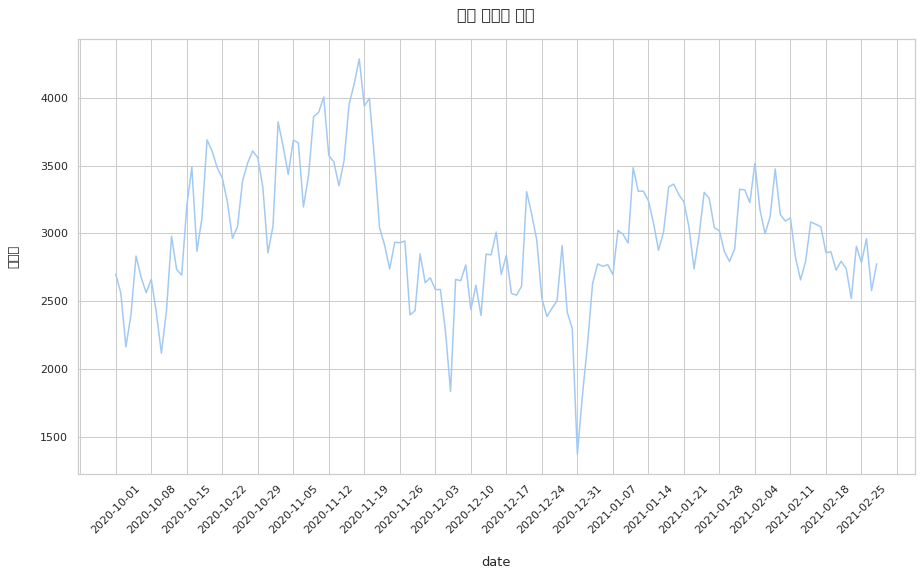

In [19]:
sns.set_theme(style="whitegrid", palette="pastel")
plt.rc("font", family="NanumBarunGothic")
plt.xticks(rotation=45)

line = sns.lineplot(x = "event_date", y = "user_id", data = df2)
line.figure.set_size_inches(15,8)
line.xaxis.set_major_locator(ticker.MultipleLocator(7))
line.set_title("일별 유저수 변화", pad=20, size=16)

line.set_xlabel("date", labelpad=20,size=13)
line.set_ylabel("유저수",labelpad=20, size=13)

### Weekly Active User(WAU)

In [20]:
# 날짜의 포맷을 %Y-w%U 연도-w주차 형태로 변경
df["year_week"] = df.event_date_format.dt.strftime("%Y-w%U")
df["year_week"]

<ipython-input-20-dcf1869de795>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["year_week"] = df.event_date_format.dt.strftime("%Y-w%U")


28074     2020-w39
28075     2020-w39
28076     2020-w39
28077     2020-w39
28078     2020-w39
            ...   
885124    2021-w09
885125    2021-w09
885126    2021-w09
885127    2021-w09
885128    2021-w09
Name: year_week, Length: 857055, dtype: object

In [21]:
# 주별 unique user 수 계산하기
df_week = df.groupby("year_week")[["user_id"]].nunique()
df_week

,user_id
year_week,
2020-w39,7141
2020-w40,16633
2020-w41,19305
2020-w42,22179
2020-w43,21956
2020-w44,23126
2020-w45,24038
2020-w46,25600
2020-w47,18586


In [22]:
df_week.describe()

,user_id
count,24.000000
mean,17555.083333
std,5837.987920
min,2775.000000
25%,16738.000000
50%,18778.500000
75%,20581.750000
max,25600.000000


Text(0, 0.5, '유저수')

C:\Users\none\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 50672 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\none\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\none\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 51452 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\none\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 52264 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\none\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 48324 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\none\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 50976 missing from current

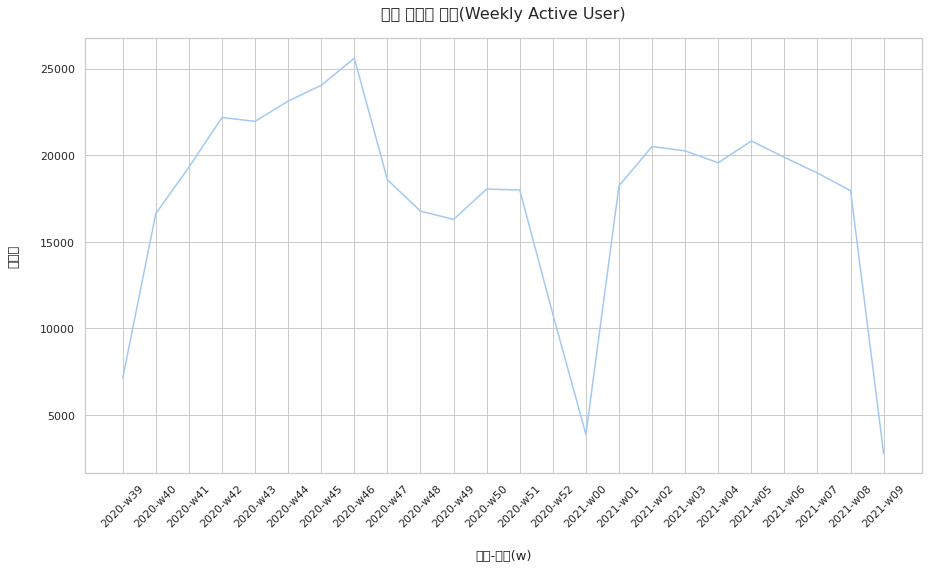

In [25]:
sns.set_theme(style="whitegrid", palette="pastel") 
plt.rc('font', family='NanumBarunGothic') 
plt.xticks(rotation=45) 

g = sns.lineplot(x='year_week', y='user_id', data=df_week) 
g.figure.set_size_inches(15, 8) 
g.set_title("주별 유저수 변화(Weekly Active User)", pad=20, size=16) 

g.set_xlabel("연도-주차(w)",labelpad = 20, size = 13) 
g.set_ylabel("유저수",labelpad = 20, size = 13) # 2020-w52, 2021-w00이 너무 낮음

In [26]:
df3 =df.groupby("year_week")["event_date"].nunique()
df3.head(100)

year_week
2020-w39    3
2020-w40    7
2020-w41    7
2020-w42    7
2020-w43    7
2020-w44    7
2020-w45    7
2020-w46    7
2020-w47    7
2020-w48    7
2020-w49    7
2020-w50    7
2020-w51    7
2020-w52    5
2021-w00    2
2021-w01    7
2021-w02    7
2021-w03    7
2021-w04    7
2021-w05    7
2021-w06    7
2021-w07    7
2021-w08    7
2021-w09    1
Name: event_date, dtype: int64

In [30]:
# 2021-w00을 2020-w52로 바꿈
aa = "2021-w00"
bb = "2020-w52"
df.loc[df.year_week == aa,["year_week"]] = bb

# 앞의 3일 제거
df_without_week_count_under_7 = (
    df.loc[(df["year_week"] != "2020-w38"),:]
)

# 뒤에 1일 제거
df_without_week_count_under_7 = (
    df_without_week_count_under_7.loc[(df_without_week_count_under_7["year_week"] != '2021-w09'),:]
)

In [32]:
df_without_week_count_under_7

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,event_date,event_date_format,year_week
28074,2020-10-01 00:01:36 UTC,view,1795171,2144415922360680550,computers.peripherals.camera,canyon,39.75,1515915625520113390,4X2NwIInsI,2020-10-01,2020-10-01,2020-w39
28075,2020-10-01 00:04:11 UTC,view,1549819,2144415925011480748,stationery.cartrige,xerox,69.35,1515915625521278799,daM8ubpOfo,2020-10-01,2020-10-01,2020-w39
28076,2020-10-01 00:07:23 UTC,view,4156248,2144415921169498184,NaN,NaN,17.14,1515915625521278938,EdgYsorbdC,2020-10-01,2020-10-01,2020-w39
28077,2020-10-01 00:07:56 UTC,view,16101,2144415922360680550,computers.peripherals.camera,NaN,30.38,1515915625520113390,4X2NwIInsI,2020-10-01,2020-10-01,2020-w39
28078,2020-10-01 00:08:11 UTC,view,880508,2144415926806642904,computers.components.power_supply,cougar,57.13,1515915625521279091,Et4GWStGMB,2020-10-01,2020-10-01,2020-w39
...,...,...,...,...,...,...,...,...,...,...,...,...
879856,2021-02-27 23:54:18 UTC,view,3605626,2144415927284793573,computers.components.tv_tuner,NaN,135.60,1515915625610575761,4cdLnsrdN7,2021-02-27,2021-02-27,2021-w08
879857,2021-02-27 23:54:40 UTC,purchase,1282166,2144415973346640379,computers.components.hdd,samsung,60.54,1515915625596223978,23rgL9Smqy,2021-02-27,2021-02-27,2021-w08
879858,2021-02-27 23:55:01 UTC,view,3791403,2144415926966026460,computers.components.cpu,amd,236.97,1515915625610075250,jIBEdIH8sd,2021-02-27,2021-02-27,2021-w08
879859,2021-02-27 23:55:05 UTC,view,3632668,2144415922528452715,electronics.telephone,NaN,34.44,1515915625610460876,ZU12Xy1KMK,2021-02-27,2021-02-27,2021-w08


In [33]:
df_group_week = (
    df_without_week_count_under_7.groupby("year_week")[["user_id"]].nunique()
)
df_group_week

,user_id
year_week,
2020-w39,7141
2020-w40,16633
2020-w41,19305
2020-w42,22179
2020-w43,21956
2020-w44,23126
2020-w45,24038
2020-w46,25600
2020-w47,18586


In [34]:
df_group_week.describe() # 7일 이하인 주차는 제거해서 WAU의 평균이 늘어남

,user_id
count,22.000000
mean,19014.636364
std,3753.157560
min,7141.000000
25%,17963.750000
50%,19138.000000
75%,20741.250000
max,25600.000000


(0.0, 28000.0)

C:\Users\none\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 50672 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\none\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\none\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 51452 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\none\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 52264 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\none\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 48324 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\none\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 50976 missing from current

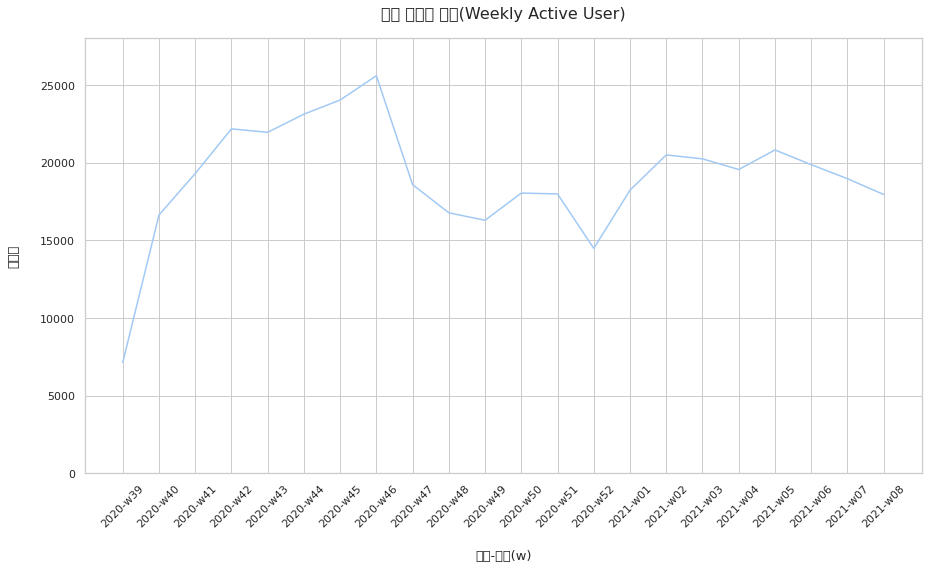

In [35]:
sns.set_theme(style="whitegrid", palette="pastel") 
plt.rc('font', family='NanumBarunGothic') 
plt.xticks(rotation=45) 

g = sns.lineplot(x='year_week', y='user_id', data=df_group_week) 
g.figure.set_size_inches(15, 8) 
g.set_title("주별 유저수 변화(Weekly Active User)", pad=20, size=16) 

g.set_xlabel("연도-주차(w)",labelpad = 20, size = 13) 
g.set_ylabel("유저수",labelpad = 20, size = 13) 


# 추가 y축 기준을 정해줌
g.set_ylim(0, 28000)

### Monthly Active User (기간: Monthly)

In [38]:
df = df.loc[(df["event_date"] > "2020-09-30")]
df["event_month"] = df["event_time"].str[:7]

# 월별 unique user수
df_month = df.groupby("event_month")[["user_id"]].nunique()
df_month.describe()

,user_id
count,5.000000
mean,80963.000000
std,8130.149937
min,72137.000000
25%,74606.000000
50%,81256.000000
75%,84216.000000
max,92600.000000


Text(0, 0.5, '유저수')

C:\Users\none\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 50672 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\none\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\none\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 50900 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\none\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 48324 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\none\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 50976 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\none\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 51200 missing from current

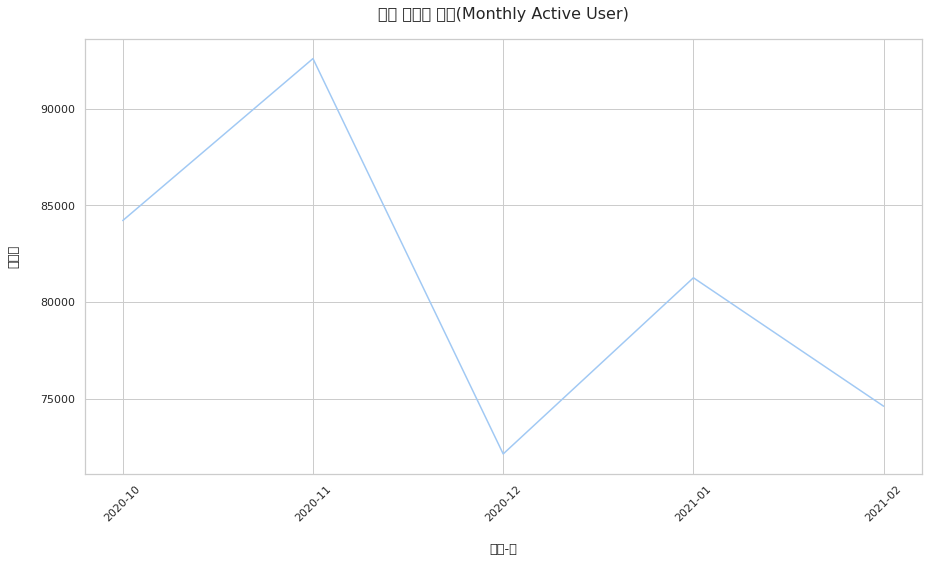

In [39]:
sns.set_theme(style="whitegrid", palette="pastel") 
plt.rc('font', family='NanumBarunGothic') 
plt.xticks(rotation=45) 

g = sns.lineplot(x='event_month', y='user_id', data=df_month) 
g.figure.set_size_inches(15, 8)
g.set_title("월별 유저수 변화(Monthly Active User)", pad=20, size=16) 

g.set_xlabel("연도-월",labelpad = 20, size = 13)
g.set_ylabel("유저수",labelpad = 20, size = 13)

- daily가 줄어들었기 때문에, monthly 또한 2021년에 갈수록 줄어드는 추세 (10,11월이 peak!)
- 유저가 감소한 것인지 계절적인 효과인지 완전히 단정할 수 없음
- 다른 특성이 존재할수도 있음

### DAU / MAU
- 한 유저가 1달에 얼마나 자주 들어오는 서비스인지 판단할 수 있는 지표

In [40]:
df2.user_id.mean()

2984.8543046357618

In [41]:
df_month.user_id.mean()

80963.0

In [45]:
dau_mean = df2.user_id.mean()
mau_mean = df_month.user_id.mean()

dau_mau_ratio = dau_mean / mau_mean
print(round(dau_mau_ratio*100,2), "%") 

3.69 %


- 전자제품은 한번 구매하면 계속 쓰는 것처럼 구매주기가 길 수 있음
- 새로 들어온 유저들이 구매하고, 1달 안에 다시 방문하는 유저들이 거의 없음

## 유저수와 세션수

- 세션
    - 서비스에 처음 방문해서 사용하다가 서비스에서 나가기까지의 여정을 하나의 세션으로 간주
    - e.g) 아침에 쿠팡을 열어서 로켓프레시로 사과를 구매하고 나왔다가 같은 날 저녁에 새벽배송을 시키러 들어와서 구매없이 나가면
    - 유저수는 1번, 세션수는 2번!
    
- 세션의 기준
    - 브라우저 : 클릭과 다음 클릭 사이의 시간이 30분 이상일 때, 다음 클릭부터 새 세션으로 간주
    - 모바일 : 앱이 백그라운드 모드에 있다가 포그라운드 모드로 전환시, 새 세션으로 간주

In [46]:
# 이 데이터셋에 세션이 이미 만들어져 있음
# 보통 각 페이지 뷰 간 30분 이상 차이날 때 새 세션으로 간주
df.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,event_date,event_date_format,year_week,event_month
28074,2020-10-01 00:01:36 UTC,view,1795171,2144415922360680550,computers.peripherals.camera,canyon,39.75,1515915625520113390,4X2NwIInsI,2020-10-01,2020-10-01,2020-w39,2020-10
28075,2020-10-01 00:04:11 UTC,view,1549819,2144415925011480748,stationery.cartrige,xerox,69.35,1515915625521278799,daM8ubpOfo,2020-10-01,2020-10-01,2020-w39,2020-10
28076,2020-10-01 00:07:23 UTC,view,4156248,2144415921169498184,NaN,NaN,17.14,1515915625521278938,EdgYsorbdC,2020-10-01,2020-10-01,2020-w39,2020-10
28077,2020-10-01 00:07:56 UTC,view,16101,2144415922360680550,computers.peripherals.camera,NaN,30.38,1515915625520113390,4X2NwIInsI,2020-10-01,2020-10-01,2020-w39,2020-10
28078,2020-10-01 00:08:11 UTC,view,880508,2144415926806642904,computers.components.power_supply,cougar,57.13,1515915625521279091,Et4GWStGMB,2020-10-01,2020-10-01,2020-w39,2020-10


### 일별 세션수

In [53]:
df["event_date"] = df["event_time"].str[:10]
df["event_date_format"] = pd.to_datetime(df["event_date"], format="%Y-%m-%d")

In [55]:
df

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,event_date,event_date_format,year_week,event_month
28074,2020-10-01 00:01:36 UTC,view,1795171,2144415922360680550,computers.peripherals.camera,canyon,39.75,1515915625520113390,4X2NwIInsI,2020-10-01,2020-10-01,2020-w39,2020-10
28075,2020-10-01 00:04:11 UTC,view,1549819,2144415925011480748,stationery.cartrige,xerox,69.35,1515915625521278799,daM8ubpOfo,2020-10-01,2020-10-01,2020-w39,2020-10
28076,2020-10-01 00:07:23 UTC,view,4156248,2144415921169498184,NaN,NaN,17.14,1515915625521278938,EdgYsorbdC,2020-10-01,2020-10-01,2020-w39,2020-10
28077,2020-10-01 00:07:56 UTC,view,16101,2144415922360680550,computers.peripherals.camera,NaN,30.38,1515915625520113390,4X2NwIInsI,2020-10-01,2020-10-01,2020-w39,2020-10
28078,2020-10-01 00:08:11 UTC,view,880508,2144415926806642904,computers.components.power_supply,cougar,57.13,1515915625521279091,Et4GWStGMB,2020-10-01,2020-10-01,2020-w39,2020-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
885124,2021-02-28 23:55:01 UTC,view,953226,2144415927553229037,NaN,NaN,219.94,1515915625611023730,FRLqIttxKU,2021-02-28,2021-02-28,2021-w09,2021-02
885125,2021-02-28 23:58:05 UTC,view,1715907,2144415927049912542,electronics.video.tv,starwind,80.03,1515915625611024014,g6WqPf50Ma,2021-02-28,2021-02-28,2021-w09,2021-02
885126,2021-02-28 23:58:09 UTC,view,4170534,2144415939364389423,electronics.clocks,amazfit,64.92,1515915625611024020,xNIJBqZdkd,2021-02-28,2021-02-28,2021-w09,2021-02
885127,2021-02-28 23:58:14 UTC,view,888273,2144415921932861531,electronics.telephone,NaN,10.16,1515915625611024030,9pCbKMIcSx,2021-02-28,2021-02-28,2021-w09,2021-02


In [56]:
# 일별 unique user 수
df_unique_userSession = df.loc[:,["user_id","user_session","event_time","event_date"]].groupby("event_date").agg(["nunique","count"])
df_unique_userSession.sort_values("event_date").head(5)

user_id       user_session       event_time      
           nunique count      nunique count    nunique count
event_date                                                  
2020-10-01    2699  4657         2847  4654       4500  4657
2020-10-02    2559  4555         2728  4554       4397  4555
2020-10-03    2162  3774         2271  3774       3666  3774
2020-10-04    2398  4413         2529  4413       4231  4413
2020-10-05    2832  4982         3002  4981       4790  4982

In [57]:
# 일별 유저수, 세션수, 이벤트 수 차이
agg = df_unique_userSession.sort_values("event_date")
userSession_agg = pd.DataFrame({
    "user_session" : agg[("user_id","nunique")],
    "session_count" : agg[("user_session", "nunique")],
    "event_count" : agg[("event_time","count")]
})
userSession_agg.head(5)

,user_session,session_count,event_count
event_date,,,
2020-10-01,2699,2847,4657
2020-10-02,2559,2728,4555
2020-10-03,2162,2271,3774
2020-10-04,2398,2529,4413
2020-10-05,2832,3002,4982


In [58]:
# 유저별 일일 세션수
userSession_agg["session_per_user"] = userSession_agg["session_count"] / userSession_agg["user_session"]

# 세션별 이벤트 클릭수
userSession_agg["clicks_per_session"] = userSession_agg["event_count"] / userSession_agg["session_count"]

In [59]:
userSession_agg.head()

,user_session,session_count,event_count,session_per_user,clicks_per_session
event_date,,,,,
2020-10-01,2699,2847,4657,1.054835,1.635757
2020-10-02,2559,2728,4555,1.066041,1.669721
2020-10-03,2162,2271,3774,1.050416,1.661823
2020-10-04,2398,2529,4413,1.054629,1.744958
2020-10-05,2832,3002,4982,1.060028,1.659560


In [60]:
melted_df = pd.melt(
    userSession_agg.reset_index(),
    id_vars = ["event_date"],
    value_vars=["session_per_user",
               "clicks_per_session"]
)
melted_df.head()

,event_date,variable,value
0,2020-10-01,session_per_user,1.054835
1,2020-10-02,session_per_user,1.066041
2,2020-10-03,session_per_user,1.050416
3,2020-10-04,session_per_user,1.054629
4,2020-10-05,session_per_user,1.060028


Text(0, 0.5, 'variable')

C:\Users\none\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 51068 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\none\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 51088 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\none\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 50976 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\none\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 51200 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\none\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 48324 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\none\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 54217 missing from current

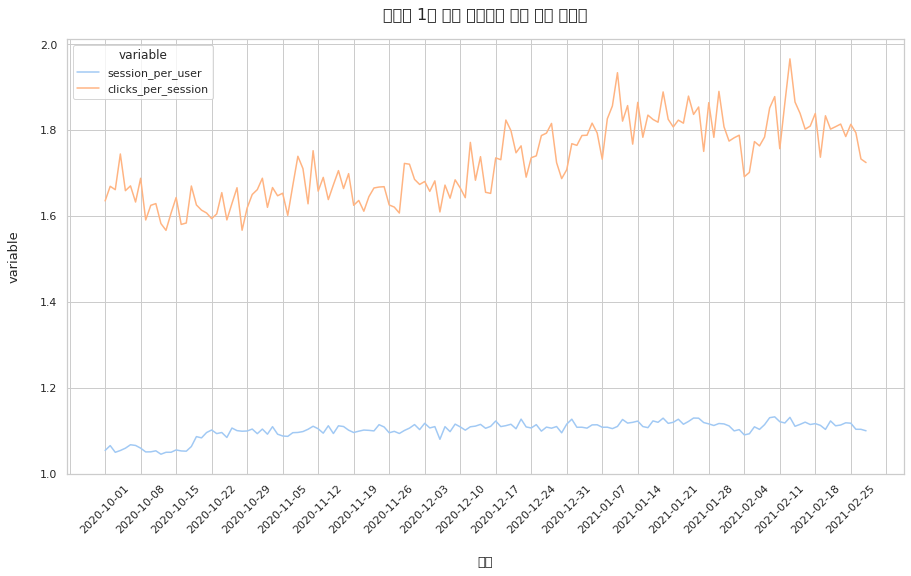

In [61]:
# 세션 및 클릭 그래프를 통해서 확인
sns.set_theme(style="whitegrid", palette="pastel")
plt.rc("font",family="NanumBarunGothic")
plt.xticks(rotation=45)

line = sns.lineplot(x="event_date", y="value", hue="variable", data = melted_df)
line.figure.set_size_inches(15,8)
line.xaxis.set_major_locator(ticker.MultipleLocator(7))
line.set_title("유저별 1일 평균 방문수와 방문 대비 클릭수", pad=20, size=16)

line.set_xlabel("일자", labelpad=20, size=13)
line.set_ylabel("variable",labelpad=20, size=13)